---
### Aunalytics Assessment In Python // Problem Statement #1

By: Cody Culver // 
Date: 3/28/2022

---

#### Problem Statement
The prediction task is to determine whether
a person makes over 50K a year. Explain the
performance of the model using accuracy,
AUROC curve and confusion matrix. Feel
free to add any other metric you see fit.

#### Setting Up Analysis Environment
setting up the R environment by loading the necessary packages and datasets.

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# This was included after completing the assessment. It is to hide all warnings for package updates, and cleans up the report.
import warnings
warnings.filterwarnings("ignore")

# Importing the datasets
training_set = pd.read_csv('au_train.csv')
test_set = pd.read_csv('au_test.csv')

#### Data Cleaning and Exploration
Going through typical data investigations via overviews, null checks, metadata confirmation, trimming, and sanity checks.

In [2]:
training_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
n=len(training_set['workclass'].unique())
print(n)

9


In [5]:
n=len(training_set['education'].unique())
print(n)

16


In [6]:
n=len(training_set['marital-status'].unique())
print(n)

7


In [7]:
n=len(training_set['occupation'].unique())
print(n)

15


In [8]:
n=len(training_set['relationship'].unique())
print(n)

6


In [9]:
n=len(training_set['race'].unique())
print(n)

5


In [10]:
n=len(training_set['sex'].unique())
print(n)

2


In [11]:
n=len(training_set['native-country'].unique())
print(n)

42


In [12]:
n=len(training_set['class'].unique())
print(n)

2


In [13]:
# Checking for white spaces
listcheck = training_set['workclass'].tolist()
print(listcheck[:10])

[' State-gov', ' Self-emp-not-inc', ' Private', ' Private', ' Private', ' Private', ' Private', ' Self-emp-not-inc', ' Private', ' Private']


In [14]:
# Removing white space
training_set['workclass'] = training_set['workclass'].str.strip()
listcheck = training_set['workclass'].tolist()
print(listcheck[:10])

['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private', 'Private', 'Private', 'Self-emp-not-inc', 'Private', 'Private']


In [15]:
# Removing white spaces and extra characters of training set and test set
training_set['education'] = training_set['education'].str.strip()
training_set['marital-status'] = training_set['marital-status'].str.strip()
training_set['occupation'] = training_set['occupation'].str.strip()
training_set['relationship'] = training_set['relationship'].str.strip()
training_set['race'] = training_set['race'].str.strip()
training_set['sex'] = training_set['sex'].str.strip()
training_set['native-country'] = training_set['native-country'].str.strip()
training_set['class'] = training_set['class'].str.strip()

test_set['workclass'] = test_set['workclass'].str.strip()
test_set['education'] = test_set['education'].str.strip()
training_set['marital-status'] = training_set['marital-status'].str.strip()
test_set['occupation'] = test_set['occupation'].str.strip()
test_set['relationship'] = test_set['relationship'].str.strip()
test_set['race'] = test_set['race'].str.strip()
test_set['sex'] = test_set['sex'].str.strip()
test_set['native-country'] = test_set['native-country'].str.strip()
test_set['class'] = test_set['class'].str.strip()
test_set['class'] = test_set['class'].str.strip('.')

# Sanity checks
listcheck = test_set['class'].tolist()
print(listcheck[:10])
listcheck = test_set['workclass'].tolist()
print(listcheck[:10])
listcheck = test_set['relationship'].tolist()
print(listcheck[:10])

['<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K']
['Private', 'Private', 'Local-gov', 'Private', '?', 'Private', '?', 'Self-emp-not-inc', 'Private', 'Private']
['Own-child', 'Husband', 'Husband', 'Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Husband', 'Unmarried', 'Husband']


In [16]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
# Dropping education-num because it has the same representation as education
training_set = training_set.drop('education-num', 1)
test_set = test_set.drop('education-num', 1)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  class           32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


#### Encoding Categorical Variables and Seperating the Dependent Variable 

In [18]:
# Encoding categorical variables in training set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'):
    training_set[i] = le.fit_transform(training_set[i])

In [19]:
# Encoding categorical variables in test set
for i in ('workclass','education','marital-status','occupation','relationship','race','sex','native-country','class'):
    test_set[i] = le.fit_transform(test_set[i])

In [20]:
# Variable splitting
train_iv = training_set.iloc[:, :-1].values
train_dv = training_set.iloc[:, -1].values

test_iv = test_set.iloc[:, :-1].values
test_dv = test_set.iloc[:, -1].values

# Sanity checking variable splits
print(train_iv)
print(train_dv)
print(test_iv)
print(test_dv)

[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    58      4 151910 ...      0     40     39]
 [    22      4 201490 ...      0     20     39]
 [    52      5 287927 ...      0     40     39]]
[0 0 0 ... 0 0 1]
[[    25      4 226802 ...      0     40     38]
 [    38      4  89814 ...      0     50     38]
 [    28      2 336951 ...      0     40     38]
 ...
 [    38      4 374983 ...      0     50     38]
 [    44      4  83891 ...      0     40     38]
 [    35      5 182148 ...      0     60     38]]
[0 0 1 ... 0 0 1]


#### Feature Scaling

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_iv[:,[0,2,9,10,11]] = sc.fit_transform(train_iv[:,[0,2,9,10,11]])
test_iv[:,[0,2,9,10,11]] = sc.transform(test_iv[:,[0,2,9,10,11]])

print(train_iv)
print(test_iv)

[[ 0  7 -1 ...  0  0 39]
 [ 0  6 -1 ...  0 -2 39]
 [ 0  4  0 ...  0  0 39]
 ...
 [ 1  4  0 ...  0  0 39]
 [-1  4  0 ...  0 -1 39]
 [ 0  5  0 ...  0  0 39]]
[[ 0  4  0 ...  0  0 38]
 [ 0  4  0 ...  0  0 38]
 [ 0  2  1 ...  0  0 38]
 ...
 [ 0  4  1 ...  0  0 38]
 [ 0  4 -1 ...  0  0 38]
 [ 0  5  0 ...  0  1 38]]


#### Algorithm Comparisons and Predictions
Next, I am performing two variations of k-Fold Cross Validation using XGBoost. Due to the vast majority (>99.5%) of capital-gain and capital-loss variables having a value of '0', I want to determine if it is better to ignore these values or use them in the models.

In [22]:
# -------------------------
# Including capital-gain and capital-loss
# -------------------------

# Applying k-Fold Cross Validation to XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(verbosity = 0)
xgb_classifier.fit(train_iv, train_dv)

from sklearn.model_selection import cross_val_score
xgb_accuracies = cross_val_score(estimator = xgb_classifier, X = train_iv, y = train_dv, cv = 10)
print("Accuracy: {:.2f} %".format(xgb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(xgb_accuracies.std()*100))

Accuracy: 84.79 %
Standard Deviation: 0.49 %


In [23]:
# -------------------------
# Excluding capital-gain and capital-loss
# -------------------------

# Removing capital-gain and capital-loss variables
training_set2 = training_set.drop('capital-gain', 1)
training_set2 = training_set.drop('capital-loss', 1)
test_set2 = test_set.drop('capital-gain', 1)
test_set2 = test_set.drop('capital-loss', 1)

train_iv2 = training_set2.iloc[:, :-1].values
train_dv2 = training_set2.iloc[:, -1].values

test_iv2 = test_set2.iloc[:, :-1].values
test_dv2 = test_set2.iloc[:, -1].values

# Feature Scaling
sc = StandardScaler()
train_iv2[:,[0,2,9,10,11]] = sc.fit_transform(train_iv2[:,[0,2,9,10,11]])
test_iv2[:,[0,2,9,10,11]] = sc.transform(test_iv2[:,[0,2,9,10,11]])

# Applying k-Fold Cross Validation to XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(verbosity = 0)
xgb_classifier.fit(train_iv2, train_dv2)

from sklearn.model_selection import cross_val_score
xgb_accuracies = cross_val_score(estimator = xgb_classifier, X = train_iv2, y = train_dv2, cv = 10)
print("Accuracy: {:.2f} %".format(xgb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(xgb_accuracies.std()*100))

Accuracy: 84.41 %
Standard Deviation: 0.53 %


Capital.gain and capital.loss contain majority value '0', and the k-fold validation results show that removing these two parameters will have little to no improvement. However, for the sake of extensive invesigation and demonstration of data science skills, I will proceed using both sets of data. All coded variables ending in a '2' are for the data set excluding capital based parameters.

I will be comparing XGBoost, Random Forest, and Kernel SVM models.

#### Fitting Models

In [24]:
# -------------------------
# Including capital-gain and capital-loss
# -------------------------

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# In my exploration of translating from R to Python, I found the 
# algorithm training steps to be particularly simpler in Python
# Below is my learning of how to impliment several at a time.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

xgb_c = XGBClassifier(verbosity = 0) 
rf_c = RandomForestClassifier(random_state = 0)
ksvm_c = SVC(random_state = 0)
lr_c = LogisticRegression(random_state = 0)
dt_c = DecisionTreeClassifier(random_state = 0)
gnb_c = GaussianNB()

acclst = []

for i in(xgb_c,rf_c, ksvm_c, lr_c, dt_c,gnb_c):
    
    i.fit(train_iv, train_dv)
    y_pred = i.predict(test_iv)
    
    cm = confusion_matrix(test_dv, y_pred)
    cr = classification_report(test_dv, y_pred)
    
    acc = accuracy_score(test_dv, y_pred) * 100
    acclst.append(acc)
    
    print(i,':\n','\n','The confusion matrix:\n',cm,'\n')
    print("Accuracy: {:.2f} %".format(acc),'\n')
    print('The classification report:\n',cr,'\n')
    print('---------------------------------------')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0) :
 
 The confusion matrix:
 [[11643   792]
 [ 1684  2162]] 

Accuracy: 84.79 % 

The classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.73      0.56      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75    

In [25]:
# -------------------------
# Excluding capital.gain and capital.loss
# -------------------------

xgb_c2 = XGBClassifier(verbosity = 0) 
rf_c2 = RandomForestClassifier(random_state = 0)
ksvm_c2 = SVC(random_state = 0)
lr_c2 = LogisticRegression(random_state = 0)
dt_c2 = DecisionTreeClassifier(random_state = 0)
gnb_c2 = GaussianNB()

acclst2 = []

for i in(xgb_c2,rf_c2,ksvm_c2, lr_c2, dt_c2,gnb_c2):
    
    i.fit(train_iv2, train_dv2)
    y_pred2 = i.predict(test_iv2)
    
    cm2 = confusion_matrix(test_dv2, y_pred2)
    cr2 = classification_report(test_dv2, y_pred2)
    
    acc2 = accuracy_score(test_dv2, y_pred2) * 100
    acclst2.append(acc2)
    
    print(i,':\n','\n','The confusion matrix:\n',cm2,'\n')
    print("Accuracy: {:.2f} %".format(acc2),'\n')
    print('The classification report:\n',cr2,'\n')
    print('---------------------------------------')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0) :
 
 The confusion matrix:
 [[11492   943]
 [ 1566  2280]] 

Accuracy: 84.59 % 

The classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.71      0.59      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.76    

Looking at the confusion matrices, immediately we can see that the True Positive and True Negative values are greater than the False Positive and False Negative values in the cases of the XGBoost, Random Forest, and Decision Tree models. However, the values for False Positive and False Negative are still significant. A majority of the possible independent variable combinations will lead to a class variable value of '<=50K'.

In [27]:
tab = pd.DataFrame({'Model':['XGBoost','Random Forest','Kernel SVM',
                               'Logistic Regression','Decision Tree','GaussianNB'],
                     'Accuracy W/ Cptl': acclst,
                     'Accuracy W/O Cptl': acclst2})

tab.sort_values('Accuracy W/ Cptl', ascending = False)

,Model,Accuracy W/ Cptl,Accuracy W/O Cptl
0,XGBoost,84.792089,84.589399
1,Random Forest,83.434678,82.869603
4,Decision Tree,81.340213,81.229654
3,Logistic Regression,79.172041,78.091026
5,GaussianNB,79.036914,78.791229
2,Kernel SVM,77.200418,78.791229


The best accuracy value (XGBoost with capital) is ~85%, which is not bad, but this algorithm could possibly be improved by having more accurate data recorded for indepedent variables 'capital.gain' and 'capital.loss'.

The XG Boost algorithm has the best accuracy, and therefore will be used acquire a confusion matrix and Area Under the Receiver Operating Characteristic curve (AUROC curve). AUROC curves can be created quickly, so I will continue to compare the dataset that includes capital vs the dataset that excludes it. It is worth noting that Kernel SVM took much longer to run than the other models.

#### AUROC Curve

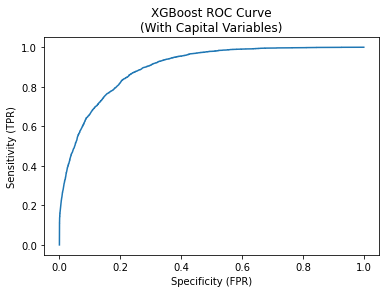

XGBoost AUC Score (With Capital Variables):
 0.8979 



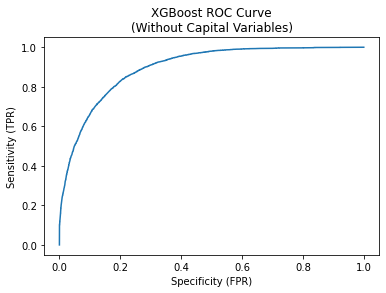

XGBoost AUC Score (Without Capital Variables):
 0.8971 



In [28]:
# Calculating ROC curve and AUC for XG Boost when including capital variables
from sklearn import metrics

y_pred_proba = xgb_c.predict_proba(test_iv)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_dv, y_pred_proba)
auc = metrics.roc_auc_score(test_dv, y_pred_proba)

# Creating ROC Curve
plt.plot(fpr,tpr)
plt.title('XGBoost ROC Curve\n(With Capital Variables)')
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.show()

print('XGBoost AUC Score (With Capital Variables):\n',round(auc, 4),'\n')

# Calculating ROC curve and AUC for XG Boost when excluding capital variables
from sklearn import metrics

y_pred_proba2 = xgb_c2.predict_proba(test_iv2)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(test_dv2, y_pred_proba2)
auc2 = metrics.roc_auc_score(test_dv2, y_pred_proba2)

# Creating ROC Curve
plt.plot(fpr2,tpr2)
plt.title('XGBoost ROC Curve\n(Without Capital Variables)')
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.show()
    
print('XGBoost AUC Score (Without Capital Variables):\n',round(auc2, 4),'\n')

The XGBoost AUROC curve has a very good value of 0.8856, implying that the XGBoost model has great discriminatory ability. This means 88.56% of the time the XGBoost model will correctly assign a salary range to a randomly selecting individual when knowing all the values of that individual's independent variables. Having a value above 0.8 would mean the algorithm is very solid, and should be the target for an appropriate algorithm. XGBoost is working well in this case.

Earlier we saw that including capital gain and capital loss slightly improved the k-fold validation of the XGBoost model. However, the AUROC curves show that excluding the capital variables has a slight improvement on the discriminatory ability of the XGBoost model. 

If the capital gain and capital loss values are inaccurate within this dataset, updating these values may improve the AUROC curve. If the capital gain and capital loss values are accurate, perhaps excluding these values will be better for the models involving even larger data sets, as it will improve processing time.

### Extra Content
#### Exploring the situation where all individual variables are used in feature scaling.
While working on this Python translation, I caught a feature scaling error I made in my R modeling, and it had me wondering how the results would change if I was to apply feature scaling to all individual variables. That is being checked here.

In [29]:
#Variable splitting for new dataset
train_iv3 = training_set.iloc[:, :-1].values
train_dv3 = training_set.iloc[:, -1].values

test_iv3 = test_set.iloc[:, :-1].values
test_dv3 = test_set.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_iv3[:,:] = sc.fit_transform(train_iv3[:,:])
test_iv3[:,:] = sc.transform(test_iv3[:,:])

#### Fitting Models

In [30]:
# -------------------------
# Including capital.gain and capital.loss, feature scaling all variables
# -------------------------

xgb_c3 = XGBClassifier(verbosity = 0) 
rf_c3 = RandomForestClassifier(random_state = 0)
ksvm_c3 = SVC(random_state = 0)
lr_c3 = LogisticRegression(random_state = 0)
dt_c3 = DecisionTreeClassifier(random_state = 0)
gnb_c3 = GaussianNB()

acclst3 = []

for i in(xgb_c3,rf_c3, ksvm_c3, lr_c3, dt_c3, gnb_c3):
    
    i.fit(train_iv3, train_dv3)
    y_pred3 = i.predict(test_iv3)
    
    cm3 = confusion_matrix(test_dv3, y_pred3)
    cr3 = classification_report(test_dv3, y_pred3)
    
    acc3 = accuracy_score(test_dv3, y_pred3) * 100
    acclst3.append(acc3)
    
    print(i,':\n','\n','The confusion matrix:\n',cm3,'\n')
    print("Accuracy: {:.2f} %".format(acc3),'\n')
    print('The classification report:\n',cr3,'\n')
    print('---------------------------------------')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0) :
 
 The confusion matrix:
 [[11721   714]
 [ 2388  1458]] 

Accuracy: 80.95 % 

The classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     12435
           1       0.67      0.38      0.48      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.66    

In [31]:
# Model accuracy table
tab3 = pd.DataFrame({'Model':['XGBoost','Random Forest','Kernel SVM',
                               'Logistic Regression','Decision Tree','GaussianNB'],
                     'Accuracy': acclst3})

tab3.sort_values('Accuracy', ascending = False)

,Model,Accuracy
0,XGBoost,80.947116
2,Kernel SVM,80.234629
1,Random Forest,79.798538
4,Decision Tree,79.208894
5,GaussianNB,78.993919
3,Logistic Regression,78.355138


Here we can see a significant drop in the accuracy of XGBoost, Random Forest, and Decision Tree, with an improvement in the accuracy of the Kernel SVM model. However, a k-Fold validation of the SVM model may reveal a large standard deviation.

#### AUROC Curve

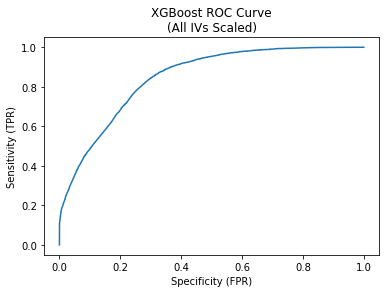

XGBoost AUC Score (All IVs Scaled):
 0.8462 



In [32]:
# Auroc Using XGBoost
y_pred_proba3 = xgb_c3.predict_proba(test_iv3)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(test_dv3, y_pred_proba3)
auc3 = metrics.roc_auc_score(test_dv3, y_pred_proba3)

# Creating ROC Curve
plt.plot(fpr3,tpr3)
plt.title('XGBoost ROC Curve\n(All IVs Scaled)')
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.show()

print('XGBoost AUC Score (All IVs Scaled):\n',round(auc3, 4),'\n')

As one may expect, the AUC Score has decreased. Feature scaling all independent variables, including encoded categories is not a viable process for machine learning in Python.